In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from scipy import stats

In [112]:
stats.norm.ppf(0.003 / 2) #1

-2.9677379253417833

In [130]:
x = np.linspace(-2.9677379253417833, 2.9677379253417833, 100)

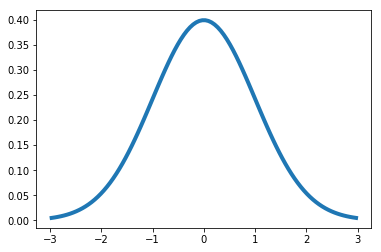

In [131]:
seaborn.lineplot(x, stats.norm.pdf(x), lw=4)

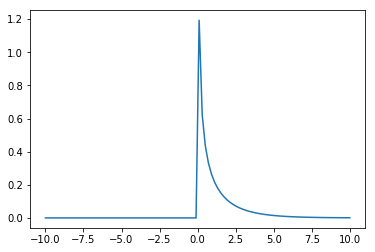

In [105]:
plt.plot(x, stats.chi2(df=1).pdf(x))

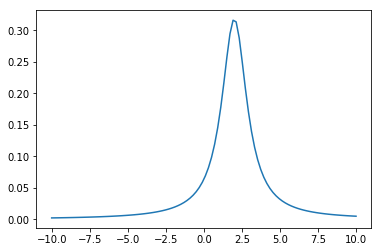

In [109]:
plt.plot(x, stats.t(1, 2).pdf(x))

In [39]:
aspirine = 11037
placebo = 11034
aspirine_death = 104
placebo_death = 189

In [80]:
aspirine_death / aspirine - placebo_death / placebo #5

-0.0077060239760047815

In [59]:
aspirine_samples = np.zeros(aspirine)
aspirine_samples[:aspirine_death] = 1

In [60]:
placebo_samples = np.zeros(placebo)
placebo_samples[:placebo_death] = 1

In [44]:
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [49]:
conf_interval_aspirine = proportion_confint(aspirine_death, 
                                            aspirine,
                                            method = 'wilson')
conf_interval_placebo = proportion_confint(placebo_death, 
                                            placebo,
                                            method = 'wilson')

In [50]:
conf_interval_aspirine, conf_interval_placebo

((0.007783358288966079, 0.011403717226138864),
 (0.014870523663224692, 0.01972332878929014))

In [54]:
proportion_confint(placebo_death - aspirine_death, placebo_death+aspirine_death, method='wilson')

(0.24112237440555667, 0.34451502109620286)

In [81]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [82]:
proportions_confint_diff_ind(aspirine_samples, placebo_samples)

(-0.010724297276960124, -0.004687750675049439)

In [83]:
proportions_confint_diff_ind(placebo_samples, aspirine_samples) #6

(0.004687750675049439, 0.010724297276960124)

In [41]:
odds_aspirine = aspirine_death / (aspirine - aspirine_death)
odds_placebo = placebo_death / (placebo - placebo_death)

In [42]:
odds_aspirine, odds_placebo

(0.009512485136741973, 0.017427385892116183)

In [52]:
(odds_aspirine / odds_placebo)**(-1) #7

1.832053941908714

In [95]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [96]:
np.random.seed(0)

aspirine_scores = get_bootstrap_samples(aspirine_samples, 1000)
placebo_scores = get_bootstrap_samples(placebo_samples, 1000)

In [98]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [99]:
odds_aspirine_scores =(aspirine_scores.mean(axis=1) / (1-aspirine_scores.mean(axis=1)))
odds_placebo_scores =(placebo_scores.mean(axis=1) / (1-placebo_scores.mean(axis=1)))

stat_intervals(odds_placebo_scores/odds_aspirine_scores, 0.05) #8

array([1.44419465, 2.34321168])